# Dipping your toe in the ocean of Computer Vision
### Using Keras and OpenCV

In [1]:
# NumPy - math library for handling matrices and arrays
import numpy as np

# MNIST dataset containing over 60 000 training and 10 000 test examples
from keras.datasets import mnist 

In [2]:
# https://keras.io/api/datasets/mnist/
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<AxesSubplot:>

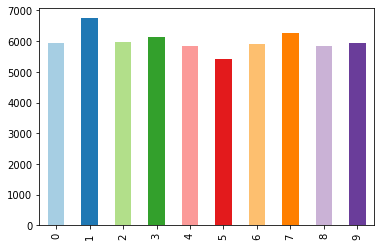

In [3]:
# Matplotlib's PyPlot - visualization library
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_records(data=[y_train])
df = df.T
df.rename(columns = {0: 'target'}, inplace=True)
count = df['target'].value_counts().sort_index()
count.plot.bar(color=plt.cm.Paired(np.arange(len(count))))

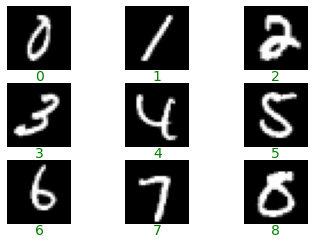

In [4]:
for i in range(9):
    ith_number = np.where(y_train == i)[0]
    random_index_number = ith_number[np.random.randint(0, (len(ith_number)))]
    plt.subplot(330 + 1 + i)
    plt.title(f"{y_train[random_index_number]}", y=-0.25, fontdict={'fontsize':14, 'color': 'green'})
    plt.axis('off')
    plt.imshow(x_train[random_index_number], cmap='gray')

plt.show()

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
x_train[0].shape

(28, 28, 1)

In [8]:
def normalize(data): 
    # Normalize data from the range of (0 --> 255) to (0.0 --> 1.0) which accelrates training
    data = data.astype('float32')
    data /= 255
    return data

In [9]:
x_train = normalize(x_train)
x_test = normalize(x_test)

In [10]:
y_train.shape

(60000,)

In [12]:
# One-Hot-Encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
number = np.where(y_train[0] == 1)
# returns a tuple of arrays, needs to enter tuple, and extract the 0'the index  
number[0][0] 

5

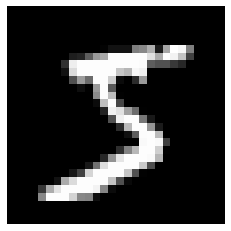

In [16]:
plt.axis('off')
plt.imshow(x_train[0], cmap='gray')
plt.show()

## Let's define a model

In [17]:
# Keras is Tensorflow's high level API for Deep Learning
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten

model = Sequential() 

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

<h3>
    Architecture Visualized
</h3>
<img src="fcnn.png" width="500"/>

## Interactive Node-Link Visualization of:
### [Fully Connected Neural Networks](https://www.cs.ryerson.ca/~aharley/vis/fc/)

### [Convolutional Neural Networks](https://www.cs.ryerson.ca/~aharley/vis/conv/)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
'''
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=32,
    verbose=1
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'loss'], loc='best')
plt.show()
'''

"\nhistory = model.fit(\n    x_train,\n    y_train,\n    epochs=30,\n    batch_size=32,\n    verbose=1\n)\n\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['loss'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['training', 'loss'], loc='best')\nplt.show()\n"

In [20]:
#model.save_weights('models/my_first_model.h5')

In [21]:
model.load_weights('models/simple_fnn_30_epochs.h5')

In [22]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

313/313 [==============================] - 0s 640us/step - loss: 0.1201 - accuracy: 0.9806
Test loss: 0.12
Test accuracy: 0.981


In [23]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 665us/step - loss: 0.1201 - accuracy: 0.9806


## Let's have some fun

In [24]:
# Inspired by Ole Kröger (https://bit.ly/3jPiBMY)

import math
from scipy import ndimage


def get_best_shift(img):
    center_y , center_x = ndimage.measurements.center_of_mass(img)

    rows, cols = img.shape
    shift_y = np.round(rows//2 - center_y)
    shift_x = np.round(cols//2 - center_x)

    return shift_x, shift_y


def shift(img, sx, sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv.warpAffine(img,M,(cols,rows))
    return shifted


def mnist_preprocessing(image, dim=28, box=20):
    resized_image = cv.resize(image, dsize=(dim, dim), interpolation=cv.INTER_LINEAR)
    gray = np.asarray(cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY))
    gray = 255 - gray
    gray = cv.resize(gray, (dim, dim))
    _, thresh = cv.threshold(gray, 128, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    
    
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray, 0, 1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray, -1, 1)

    rows,cols = gray.shape

    if rows > cols:
        factor = box/rows
        rows = box
        cols = int(round(cols*factor))
        gray = cv.resize(gray, (cols,rows))
    else:
        factor = box/cols
        cols = box
        rows = int(round(rows*factor))
        gray = cv.resize(gray, (cols, rows))

    colsPadding = (int(math.ceil((dim - cols)/2.0)),int(math.floor((dim - cols)/2.0)))
    rowsPadding = (int(math.ceil((dim - rows)/2.0)),int(math.floor((dim - rows)/2.0)))
    gray = np.pad(gray, (rowsPadding, colsPadding), 'constant')

    shiftx,shifty = get_best_shift(gray)
    shifted = shift(gray,shiftx,shifty)
    
    normalized_img = normalize(shifted)
    
    return shifted

In [25]:
def predict_single_image(model, img):
    img = np.expand_dims(img, axis=0)     # --> (1, 28, 28)
    img = np.reshape(img, [1, 28, 28, 1]) # --> (1, 28, 28, 1)
    pred = model.predict(img)
    label = np.argmax(pred[:1])
    
    return label

In [ ]:
# OpenCV - Opensource Computer Vision library
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0) 

init_frame_read_correctly, init_frame = cap.read()
if not init_frame_read_correctly:
        print("No frames to read...")
        

bounding_box = (init_frame.shape[1]//4, init_frame.shape[0]//4,
                init_frame.shape[1]//2, init_frame.shape[0]//2)    

while(cap.isOpened()):
    # Capture frame-by-frame
    frame_read_correctly, frame = cap.read()
    if not frame_read_correctly:
        print("No frames to read...")
        break
    
    
    # new_bounding_box = bounding_box
    wh = (frame.shape[1]//frame.shape[0])*200
    if frame_read_correctly:
        point1 = (frame.shape[1]//2 - wh, frame.shape[0]//2 - wh)
        point2 = (frame.shape[1]//2 + wh, frame.shape[0]//2 + wh)
        cv.rectangle(frame, point1, point2, (255, 255, 0), 2)
        

    try:
        # Crop out new ROI and process it
        new_ROI = frame[frame.shape[0]//2 - wh :frame.shape[0]//2 + wh, frame.shape[1]//2 - wh:frame.shape[1]//2 + wh]
        img = mnist_preprocessing(new_ROI)
        label = predict_single_image(model, img)

        cv.namedWindow('processed', 0)
        cv.imshow('processed', img)
        
    except Exception as e:
        print(f"Exception occured:\n{e}")
        pass

    
    # Display the resulting pred
    cv.putText(frame,
               f"{label}",
               org=(point2[0] - 75, point2[1] + 75),
               fontFace=cv.FONT_HERSHEY_PLAIN,
               fontScale=5,
               color=(255, 255, 0),
               thickness=2,
               lineType=cv.LINE_AA
              )
    
    cv.flip(frame, 1)
    cv.namedWindow('frame', 0)
    cv.resizeWindow('frame', 640, 480)
    cv.imshow('frame', frame)
    #cv.imshow('box', new_ROI)
    
    # Listen for keypress
    k = cv.waitKey(1)
    if (k & 0xFF == ord('q')) or (k % 256 == 27):
        break
    

# Release the capture afterward
cap.release()
cv.destroyAllWindows()